# Logistic Regression (~ 100 min)

![img](https://github.com/albarqounilab/EEDA-Autumn-School/raw/main/images/iris.png)

In this notebook, we will explore and work with the Iris data set (which deals with different types of the Iris flower). The Iris flower data set, or Fisher's Iris data set, is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. More information can be found at https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Image source: Unwin, Antony and Kim Kleinman. "The iris data set: In search of the source of virginica." Significance 18.6 (2021): 26-29.
First, we need to import some libraries:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
#Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ToDo (15 min):

What is each library helpful for? (You can use Google to familiarise yourself with the libraries)
Which of the lines above imports a package? Which imports a function?

## Loading the Data (10 min)

Use the load_iris function we imported in the previous step to load the data set (note that the function returns the data set, which must be stored in a variable).

Create a Pandas dataframe object containing the features (the iris['data']) and the target values (iris[target]). Note that the column names correspond to the feature names (iris['feature_names]), and an additional column is needed for the target value.

Familiarize yourself with the data set. How many different varieties of iris are in this data set?
You can use pd.head() to print the first 5 records in the data set.
You can use column_example.unique() to find all the unique elements in the example column of the Pandas data frame.

Load the data and determine the number of classes in the target column.

In [ ]:
#ToDo: Load the dataset
iris = load_iris()
#ToDo: Create pandas DataFrame based on dataset
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#ToDo: Print the different possible target values
print(dataset['target'].unique())
#ToDo: Print the first 5 records of the dataset
dataset.head()

[0. 1. 2.]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Data Exploration (15 min)

A table of numbers is not useful for interpreting dependencies between variables. Instead, let's plot the data and identify which features correlate with each other.

We will use two types of plots: scatter plots and histograms. It is important to note that scatter plots show the relationship between two variables, while histograms show the distribution of a single variable. To learn more about these types of plots, please refer to the matplot library.
To plot the correlation between our 14 features, we require a total of 196 plots. Please complete the code below, utilizing axs[COLUMN_INDEX, ROW_INDEX] to select a subplot.

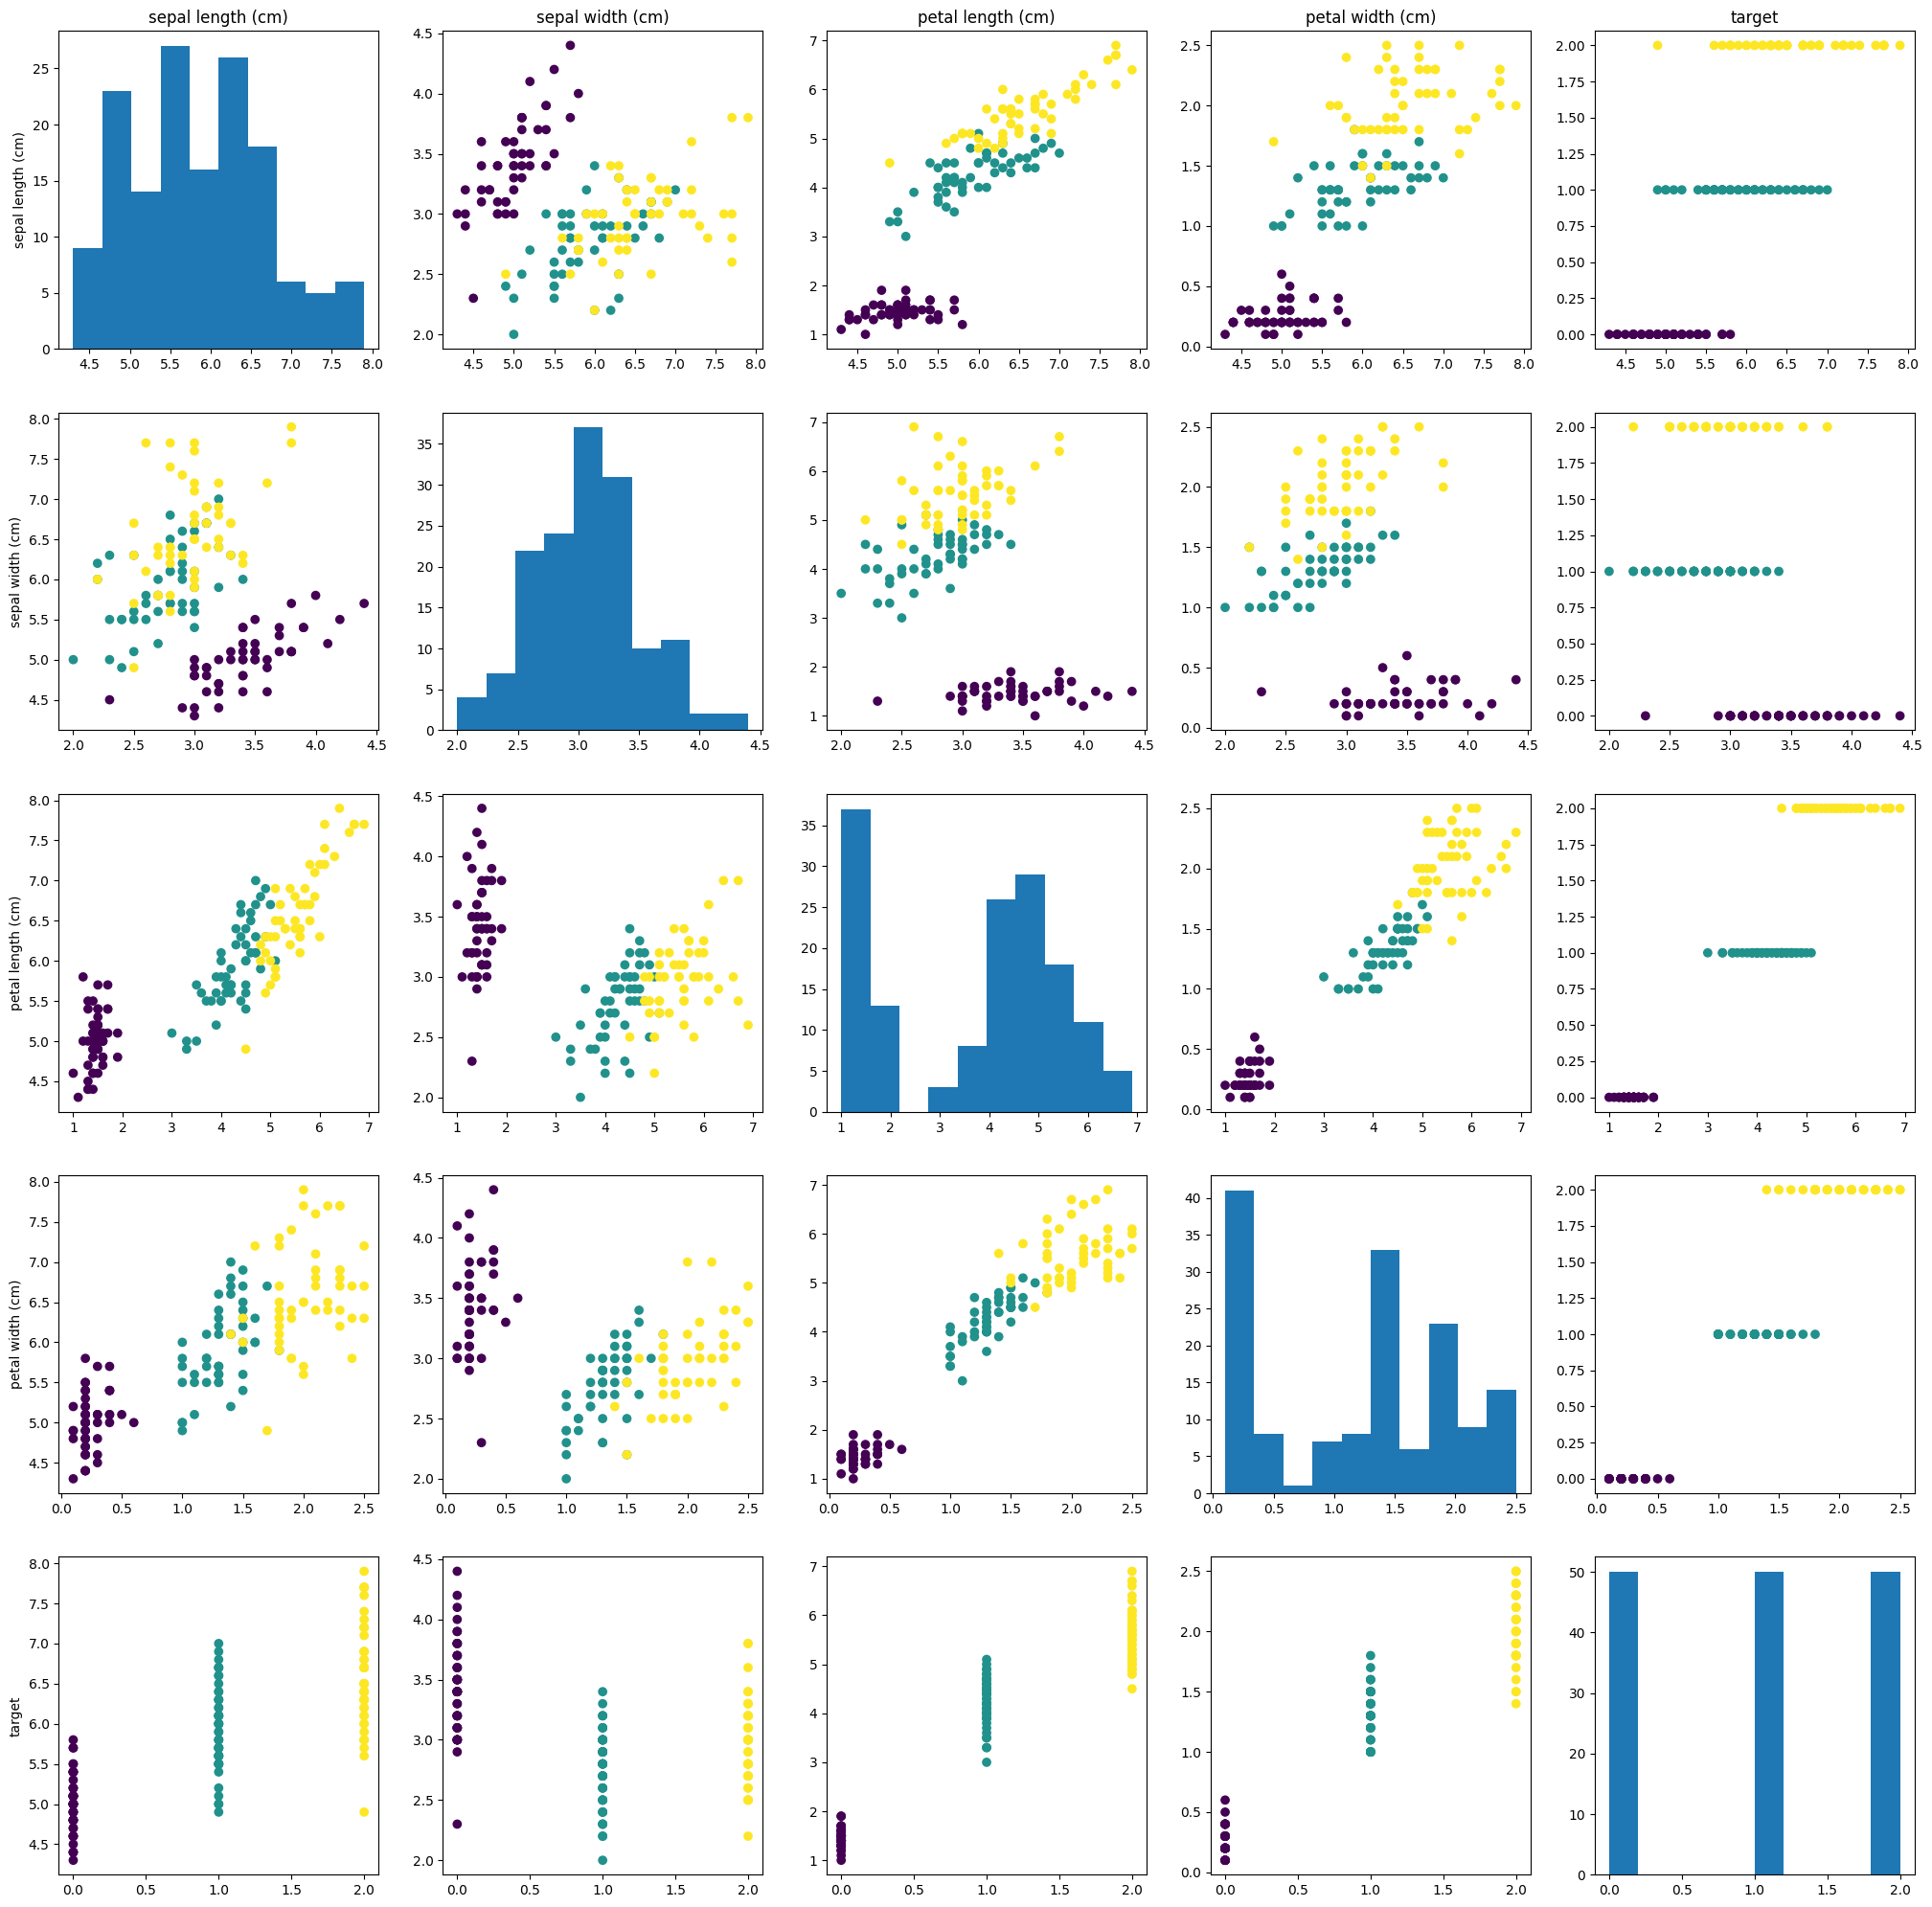

In [ ]:
fig, axs = plt.subplots(len(dataset.columns), len(dataset.columns), figsize=(25, 25))

for i in range(len(dataset.columns)):
    for j in range(len(dataset.columns)):
        if i == j:
            #ToDo: plot the histogram of column i on axis i, j (via the .hist() function)
            axs[i,j].hist(dataset[dataset.columns[i]])
        else:
            #ToDo: scatter plot the data points with column i as x and column j as y,
            #with the color of the dot defined by target value
            axs[i,j].scatter(dataset[dataset.columns[i]], dataset[dataset.columns[j]], c=dataset.target)
        axs[0,j].set_title(dataset.columns[j])
    axs[i,0].set(ylabel=dataset.columns[i])

plt.show()

To analyze our task and make future predictions, it's important to calculate the correlation between features and the target value, as well as between features themselves. A correlation matrix can be a helpful visualization tool.

A correlation matrix ([https://www.displayr.com/what-is-a-correlation-matrix/](https://www.displayr.com/what-is-a-correlation-matrix/) is a table that displays correlation coefficients between variables. Each cell in the table shows the correlation between two variables. It is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

To represent the correlation between variables, a correlation coefficient is used in a correlation matrix.

To compute the correlation matrix on your pandas dataframe, use a_pandas_dataframe.corr().

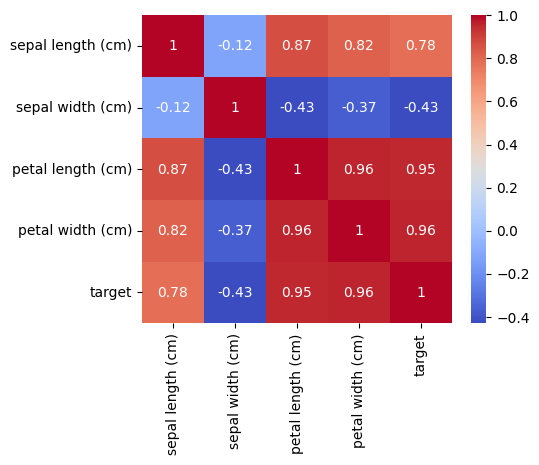

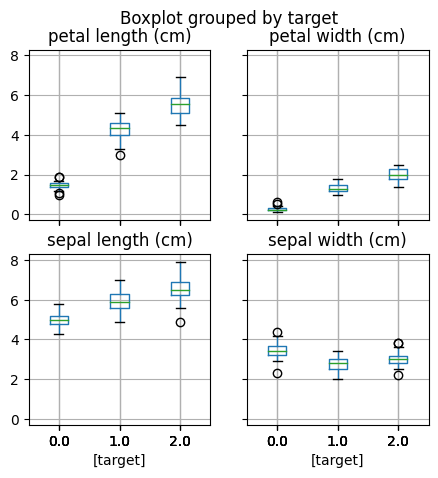

In [ ]:
correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax, cmap='coolwarm') # annot = True to print the values inside the square
plt.show()
dataset.boxplot(by="target", figsize=(5,5))
plt.show()

## Training the model (15 min)

In machine learning, model performance is typically evaluated using a test set, which consists of data that was not used during the training process. This ensures a more reliable evaluation.

To achieve this, we randomly split the dataset into a training set and a test set, with the latter containing 25% of the data.

Note that we have imported the function train_test_split from the sklearn module, submodel model_selection.

In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values

#ToDo split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

To train the classifier, first create and initialize the classifier object, in this case, a LogisticRegression object.

Then, use the classifier.fit() function to fit the classifier to the training set.

In [ ]:
# Fitting Logistic Regression to the Training set
#ToDo: create and initialise the classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
#ToDo: fir the classifier to the train set
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Evaluation of the classifier (15 min)

After fitting the model, we must evaluate its performance to determine if the method's complexity or amount of training data is sufficient.

To complete this process, follow these steps:
1. Use the trained model to predict the target values of the test set. You can do this by using `classifer.predict()`.
2. Use the trained model to predict the probabilities for each target class on the test set. To obtain the prediction in the form of probabilities for each target class, we can utilize `classifier.predict_proba()`.
3. Then, we can compare the resulting probabilities to the correct result and create a confusion matrix.

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results
probs_y = np.round(probs_y, 2)


In [ ]:
#We plot a table with target results, predicted class and probabilities for each class for every data point
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2.0        | 2.0        | 0.0        | 0.03          | 0.97      
1.0        | 1.0        | 0.01       | 0.95          | 0.04      
0.0        | 0.0        | 1.0        | 0.0           | 0.0       
2.0        | 2.0        | 0.0        | 0.08          | 0.92      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
2.0        | 2.0        | 0.0        | 0.01          | 0.99      
0.0        | 0.0        | 0.98       | 0.02          | 0.0       
1.0        | 1.0        | 0.01       | 0.71          | 0.28      
1.0        | 1.0        | 0.0        | 0.73          | 0.27      
1.0        | 1.0        | 0.02       | 0.89          | 0.08      
2.0        | 2.0        | 0.0        | 0.44          | 0.56      
1.0        | 1.0        | 0.02       | 0.76          | 0.22      
1.0        | 1.0        | 0.01       | 0.85          | 0.13      
1.0     

Our classifier's performance may vary across classes. For instance, some classes may be easily predicted while others are consistently misclassified.

A confusion matrix enables us to visualize the distinction between each class.

Each row represents the actual class, and each column represents the predicted class. The number at the intersection of row `r` and column `c` indicates how often our model predicts a point in class `r` as belonging to class `c`. The name of this matrix comes from its ability to clearly display how often our classifier confuses any two classes.

To compute the confusion matrix, use the `confusion_matrix()` function imported from `sklearn.metrics`.
To visualize the confusion matrix as a heatmap (a matrix of values where the color of each cell depends on the value), use the `heatmap()` function from the seaborn module.

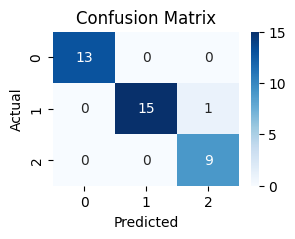

In [ ]:
#ToDo:  compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))

# ToDo: Visualize the confusion matrix
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d', cmap="Blues", ax=ax)

# Set axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set title
ax.set_title('Confusion Matrix')

# Display the plot
plt.show()

# Logistic Regression on MNIST (20 min, extra task)


The MNIST dataset (https://www.tensorflow.org/datasets/catalog/mnist) consists of handwritten digits ranging from 0 to 9.

This dataset presents a challenge for classification due to the larger number of features per data point and possible classes, making it a closer representation of real-life scenarios.To download the dataset, data loaders will be utilized.


In [ ]:
#Load MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
images, labels = mnist['data'], mnist['target']



In [ ]:
#ToDo: split into train and test set

#ToDo split the dataset into train and test
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size = 0.25, random_state = 0)

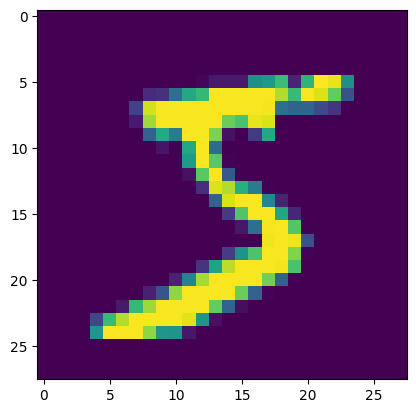

In [ ]:
images = np.array(images)
plt.imshow(images[0].reshape(28, 28))


# MNIST Data exploration

To better understand the dataset, we can visualise several images from the training data

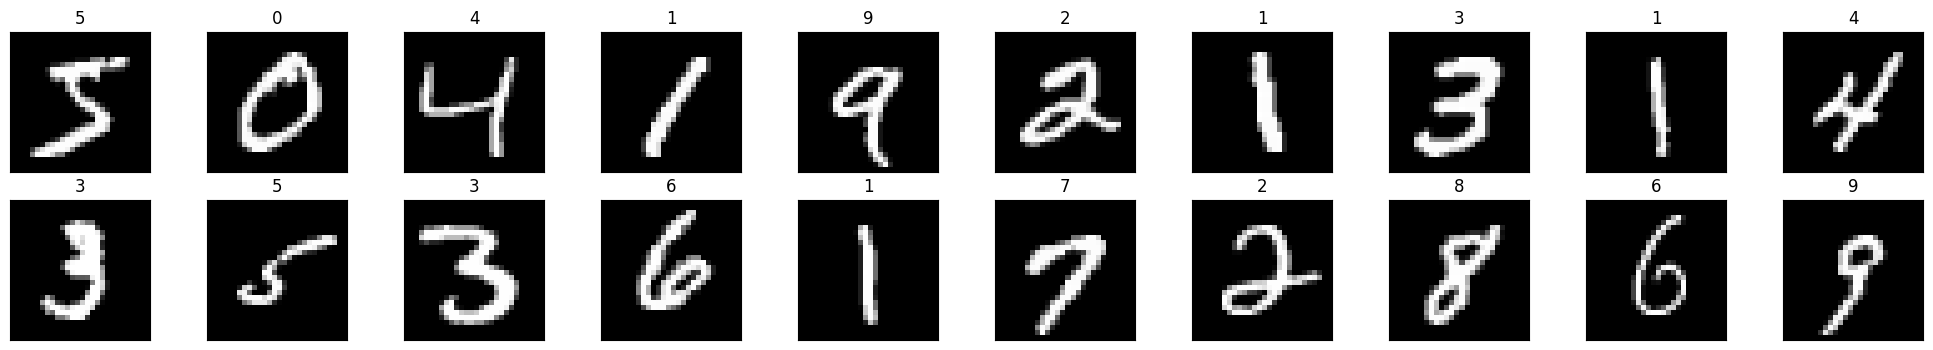

In [ ]:
#import matplotlib.pyplot as plt

# Plot the images in the batch, along with the true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx].reshape(28, 28)), cmap='gray')
    ax.set_title(labels[idx])

After gaining an understanding of the types of images present in the dataset, we should examine one image in greater detail.

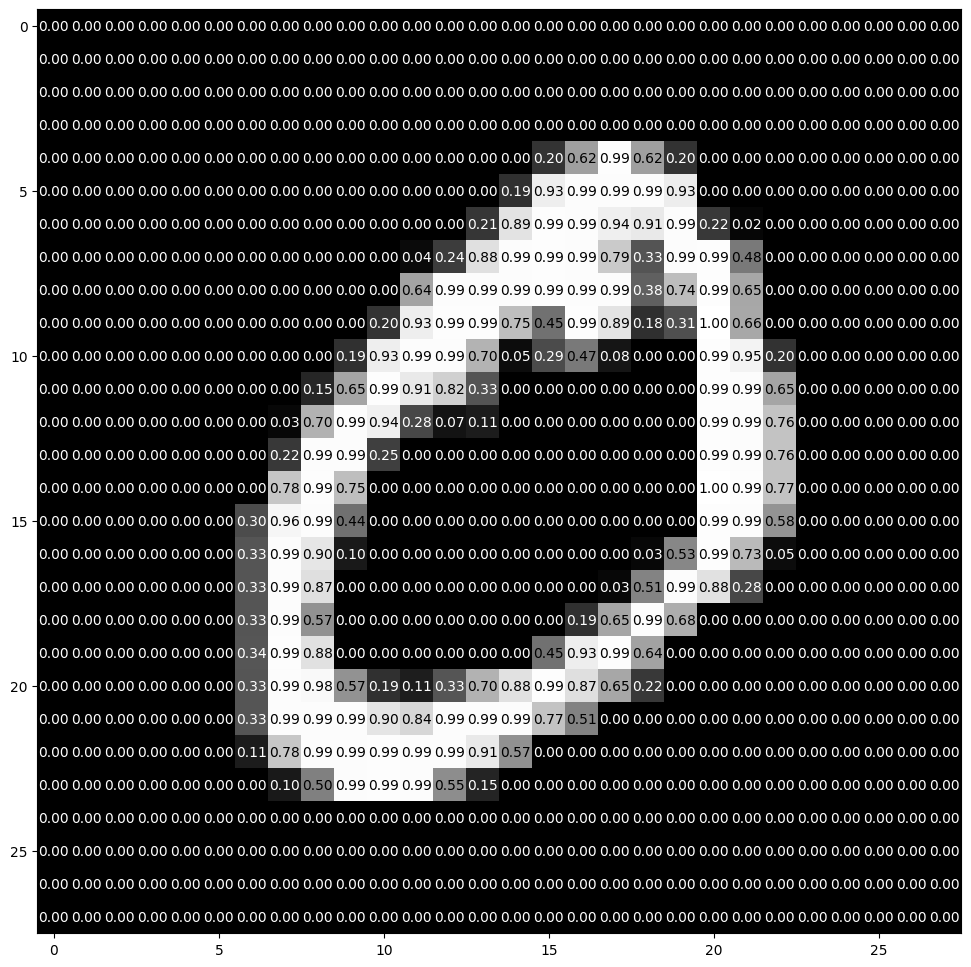

In [ ]:
img = np.squeeze(images[1].reshape(28, 28))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

width, height = img.shape
thresh = img.max() / 2.5

for x in range(width):
    for y in range(height):
        # Round the values to two decimal places
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(f'{val/255:.2f}', xy=(y, x), horizontalalignment='center', verticalalignment='center',
                    color='white' if img[x][y] < thresh else 'black')

plt.show()



To train on the newly loaded MNIST dataset, we can repeat the training process used for the iris dataset.

In [ ]:
#Fit a model to MNIST

#ToDo: create and initialise the classifier
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
#ToDo: fit the classifier to the train set
classifier.fit(images_train, labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Let us evaluate the performance of our classifier. We expect the performance to be worse, as the problem is now more complex.
This shows the necessity for more complicated machine learning methods.

In [ ]:
#Evaluate the model on MNIST dataset
#We will have to limit the number of samples for ease of visualisation

# Predicting the Test set results
y_pred = classifier.predict(images_test)

# Predict probabilities
probs_y=classifier.predict_proba(images_test)

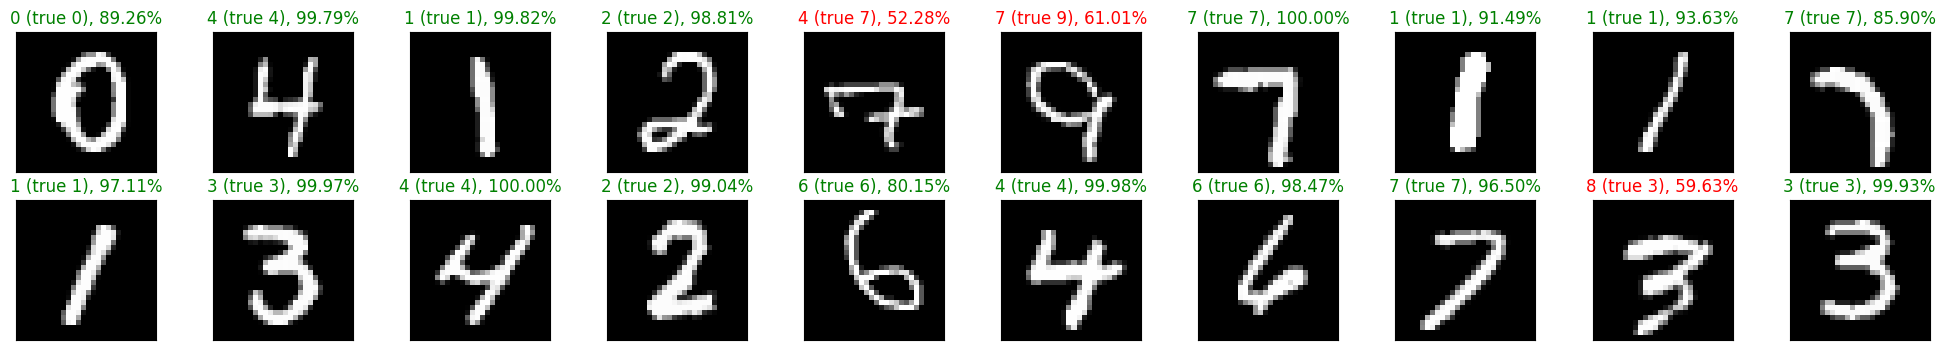

In [ ]:
# Visualise the input and prediction (same as input but predicted with percentages)
# Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    img = np.squeeze(np.array(images_test)[idx].reshape(28, 28))
    true_label = labels_test[labels_test.keys()[idx]]

    # Format the percentage with two decimal places
    percentage = "{:.2f}%".format(probs_y[idx][int(y_pred[idx])] * 100)

    ax.imshow(img, cmap='gray')
    ax.set_title("{} (true {}), {}".format(str(y_pred[idx]), str(true_label), percentage),
                 color=("green" if y_pred[idx] == true_label else "red"))

plt.show()
